<a href="https://colab.research.google.com/github/LexAguirre/Algoritmo-basado-en-aprendizaje-profundo/blob/main/Versi%C3%B3n_5_Algoritmo_basado_en_aprendizaje_profundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMO BASADO EN APRENDIZAJE PROFUNDO PARA LA DETECCIÓN DE PEATONES CON DISCAPACIDAD


Asesor: D. en C. Guerrero Ibáñez Juan Antonio

Co-asesor: D. en C. Contreras Castillo Juan José

In [ ]:
!nvidia-smi

Tue Oct  3 03:55:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.3/166.8 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://static.miscota.com/consejos/wp-content/uploads/2016/10/shutterstock_222024406-FILEminimizer.jpg' save=True

/content
2023-10-03 03:55:58.379777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 03:56:00.143478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://static.miscota.com/consejos/wp-content/uploads/2016/10/shutterstock_222024406-FILEminimizer.jpg locally at shutterstock_222024406-FILEminimizer.jpg
image 1/1 /content/shutterstock_222024406-FILEminimizer.jpg: 448x640 1 dog, 1 backpack, 106.3ms
Speed: 0.8ms pre-process, 106.3ms inference, 142.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="api_key")
project = rf.workspace("raylexaguirre").project("road-users-disabilities")
dataset = project.version(5).download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Road-users-disabilities-5 in yolov8:: 100%|██████████| 48068/48068 [00:10<00:00, 4404.27it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=75 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 151MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Road-users-disabilities-5/data.yaml, epochs=75, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch85800.jpg
events.out.tfevents.1696305422.7ea40657d65f.2234.0  train_batch85801.jpg
F1_curve.png					    train_batch85802.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


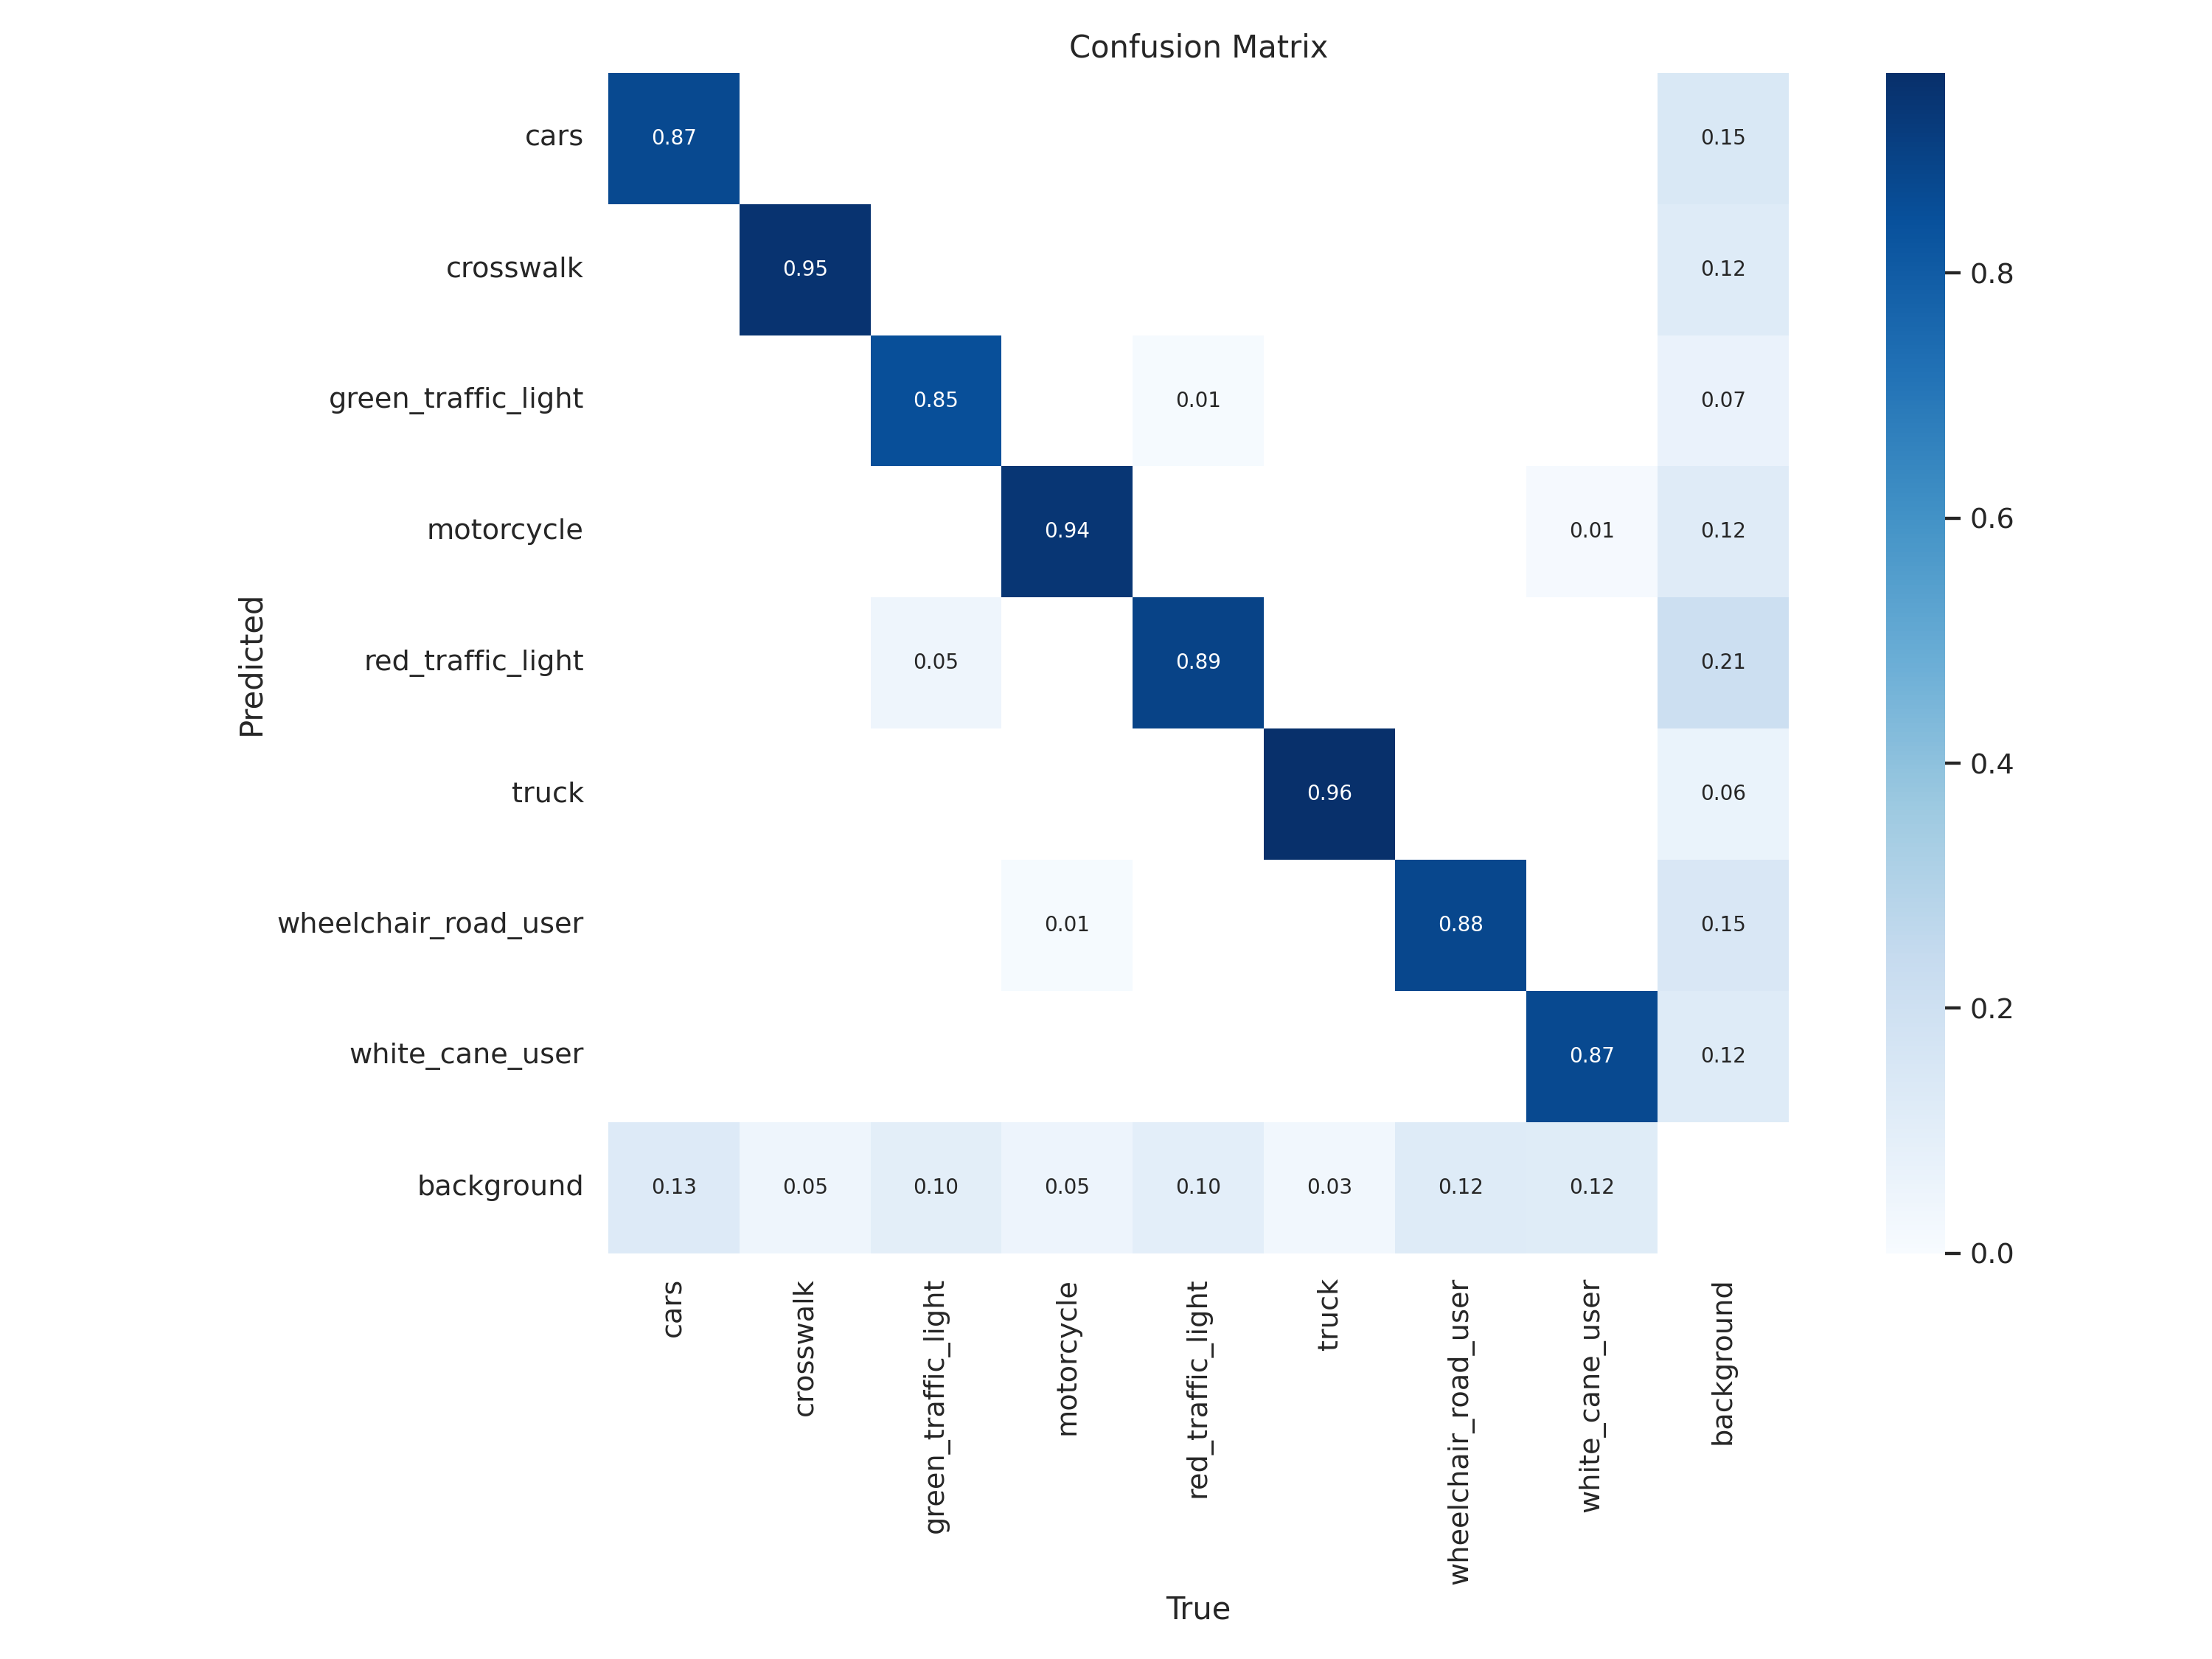

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


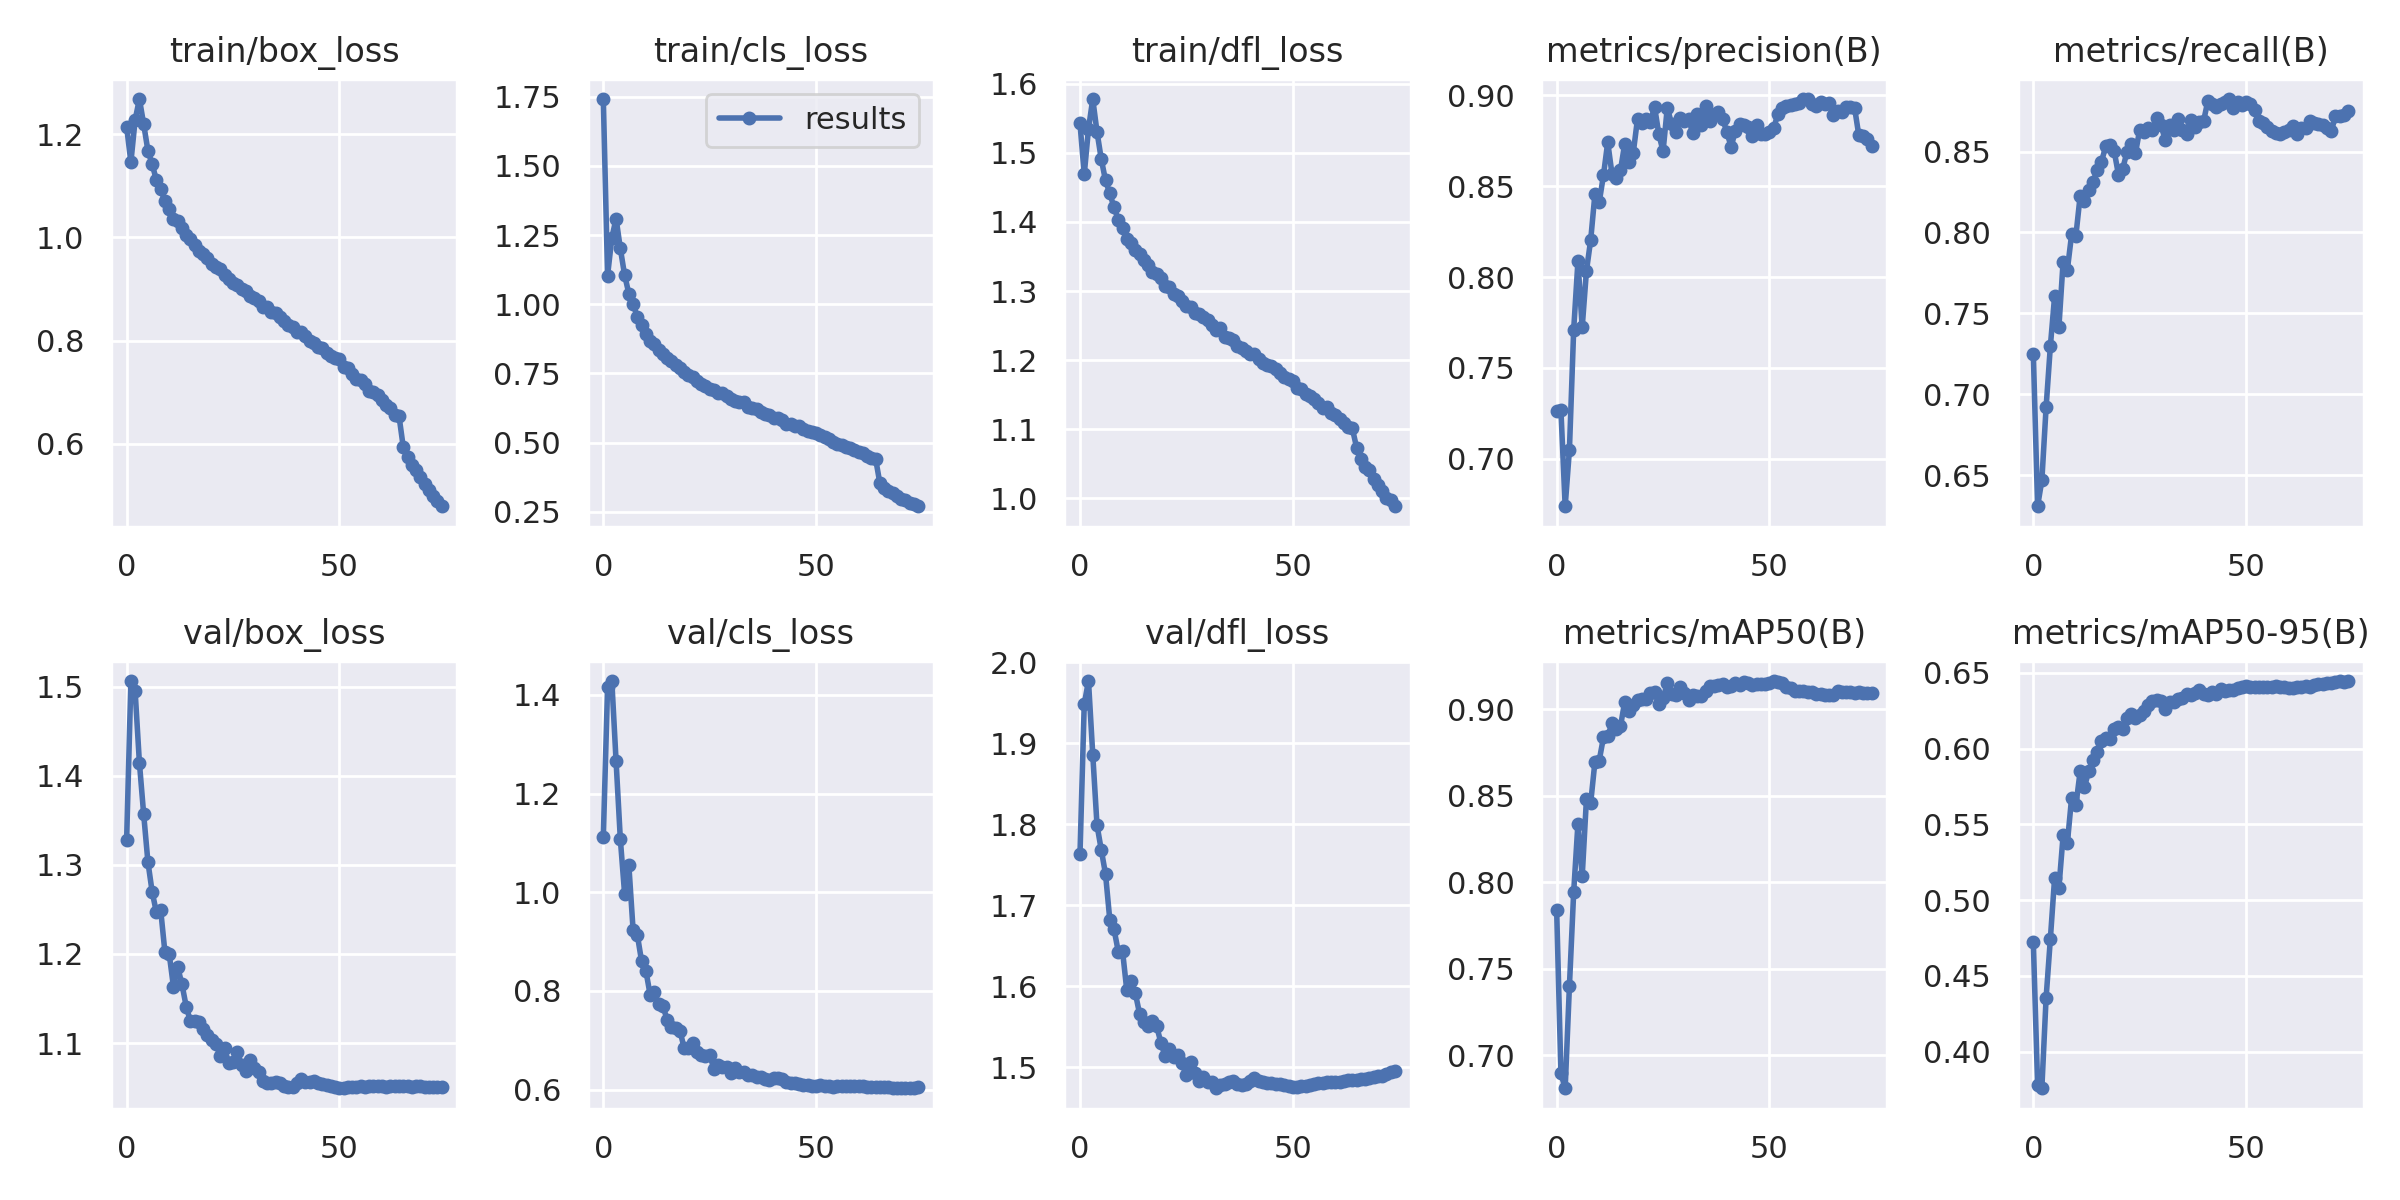

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-04 00:56:49.165313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 00:56:50.979232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Road-users-disabilities-5/valid/labels.cache... 1480 images, 1 backgrounds, 0 corrupt: 100% 1480/1480 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 47, len(boxes) = 2089. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-10-04 00:57:36.649758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 00:57:37.553078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
image 1/1438 /content/datasets/Road-users-disabilities-5/test/images/-01793629-0E31-4954-9A75-862879DDC3A7-png_jpg.rf.5f9a8dd1f4e513c1e15766f264a012d0.jpg: 800x800 1 cars, 24.7ms
image 2/1438 /content/datasets/Road-users-disabilities-5/test/images/-019AB9D4-15D1-4469-8108-7F31E8506542-png_jpg.rf.0947d21a9883856685ba6cc910c32085.jpg: 800x800 2 carss, 24.8ms
image 3/1438 /content/datase

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/raylexaguirre/road-users-disabilities/5
Share your model with the world at: https://universe.roboflow.com/raylexaguirre/road-users-disabilities/model/5
